In [1]:
# Allow the PyMC3 models to be imported in the notebook folder

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from pymc3 import summary, traceplot
import pymc3 as pm

%matplotlib inline

In [3]:
from pymc3_models.models.LinearRegression import LinearRegression

In [4]:
plt.rcParams['figure.figsize'] = (15, 10)

plt.rcParams['font.size'] = 16

Generate Synthetic Data
===

In [5]:
X = np.random.randn(1000, 1)
noise = 2 * np.random.randn(1000, 1)
Y = 4 * X + 3 + noise

In [6]:
Y = np.squeeze(Y)

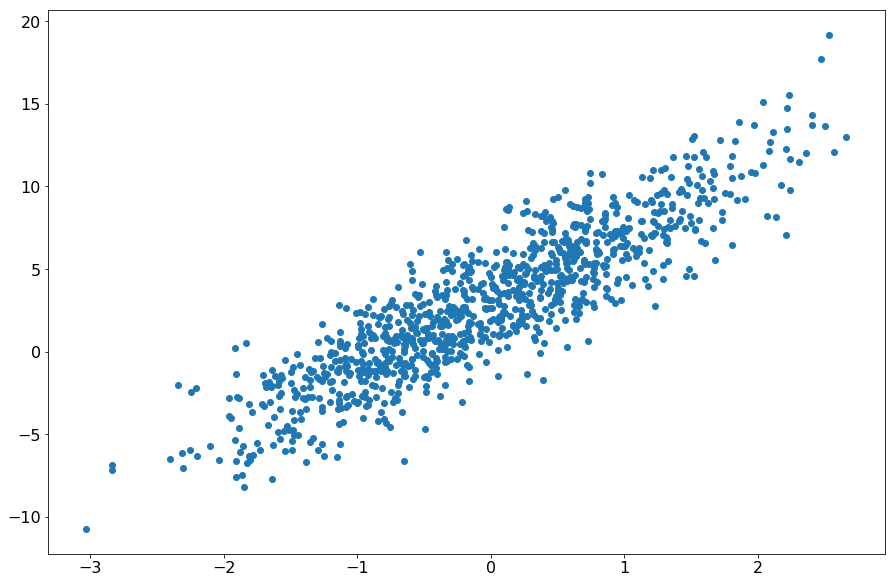

In [7]:
plt.scatter(X, Y)

Fit w/ ADVI
===

In [8]:
LR = LinearRegression()

In [9]:
LR.fit(X, Y, minibatch_size=100)

Average Loss = 228.63:  19%|█▉        | 38320/200000 [00:38<02:43, 988.45it/s] 
Convergence archived at 38400
Interrupted at 38,399 [19%]: Average Loss = 453.59


LinearRegression()

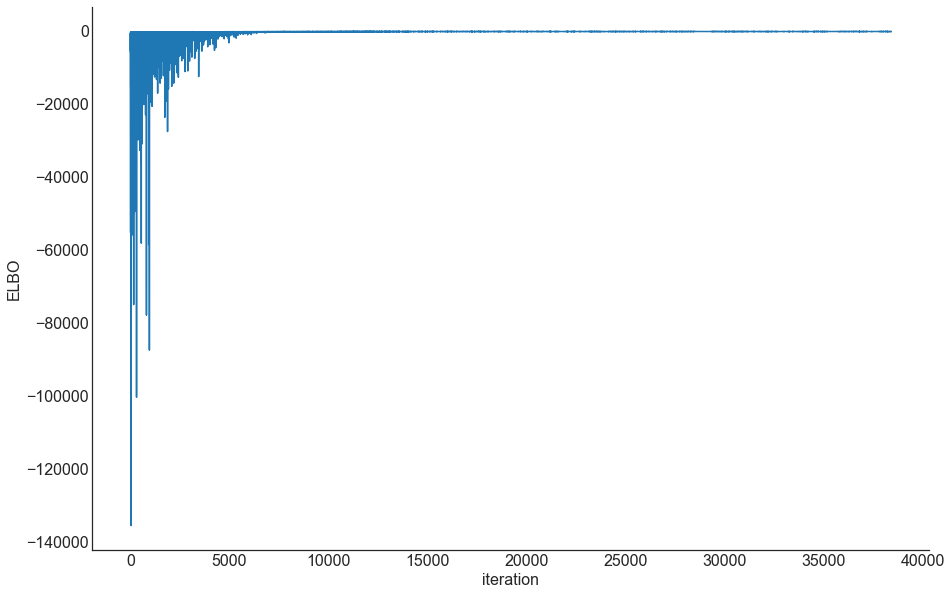

In [10]:
LR.plot_elbo()

In [11]:
Y_predict = LR.predict(X)

100%|██████████| 2000/2000 [00:00<00:00, 2024.41it/s]


In [12]:
LR.score(X, Y)

100%|██████████| 2000/2000 [00:01<00:00, 1701.40it/s]


0.79381724401742848

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11310f470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1148cd5c0>]], dtype=object)

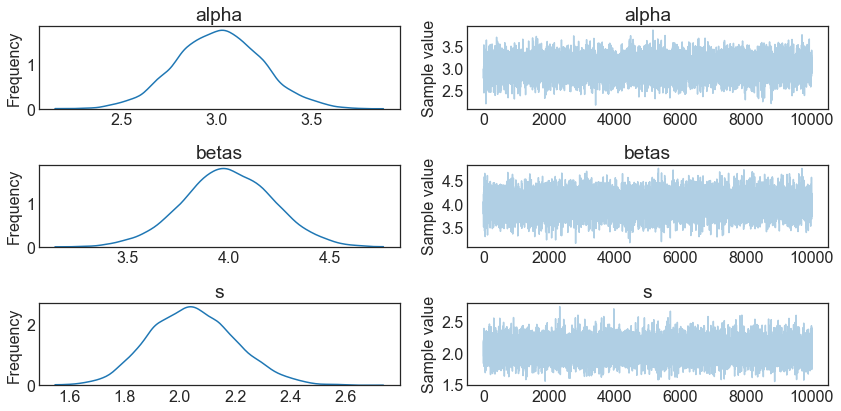

In [13]:
traceplot(LR.trace)

In [14]:
LR.summary

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha__0,3.008342,0.225801,0.002008,2.554332,3.449976
betas__0_0,3.996149,0.222923,0.002322,3.542541,4.425660
s,2.044054,0.155415,0.001369,1.759156,2.360086


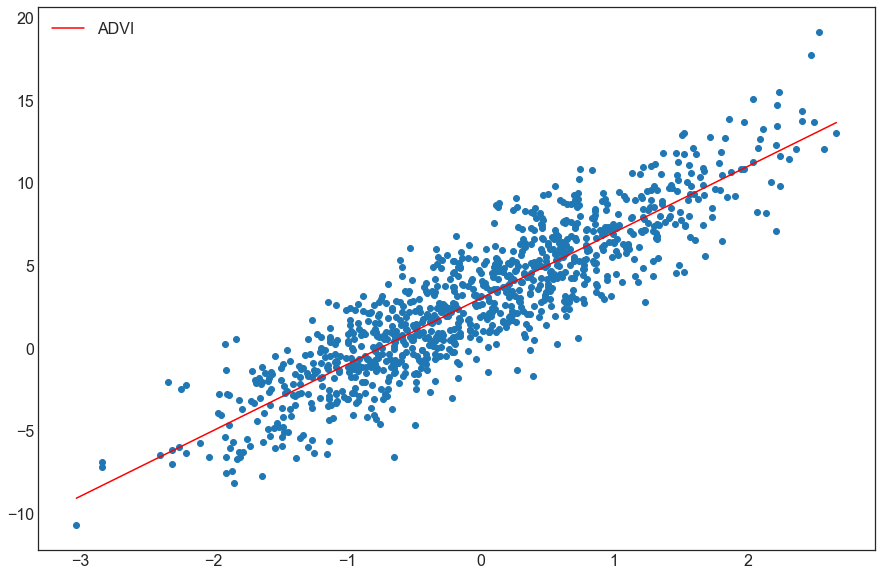

In [15]:
max_x = max(X)
min_x = min(X)

m = LR.summary['mean']['betas__0_0']
b = LR.summary['mean']['alpha__0']
fig1 = plt.figure()
#ax = fig.add_subplot(111)
plt.scatter(X, Y)
plt.plot([min_x, max_x], [m*min_x + b, m*max_x + b], 'r', label='ADVI')
plt.legend()

In [16]:
LR.save('pickle_jar/LR_jar/')

In [17]:
LR4 = LinearRegression()

In [18]:
LR4.load('pickle_jar/LR_jar/')

In [19]:
LR4.score(X, Y)

100%|██████████| 2000/2000 [00:01<00:00, 1649.41it/s]


0.7939495467195784

Fit w/ NUTS
===

In [20]:
LR2 = LinearRegression()

In [21]:
LR2.fit(X, Y, inference_type='nuts', inference_args={'draws': 2000})

100%|██████████| 2500/2500 [00:02<00:00, 962.04it/s]


LinearRegression()

In [22]:
LR2.score(X, Y)

100%|██████████| 2000/2000 [00:00<00:00, 2154.34it/s]


0.79335256810199872

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115537cf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1156ed048>]], dtype=object)

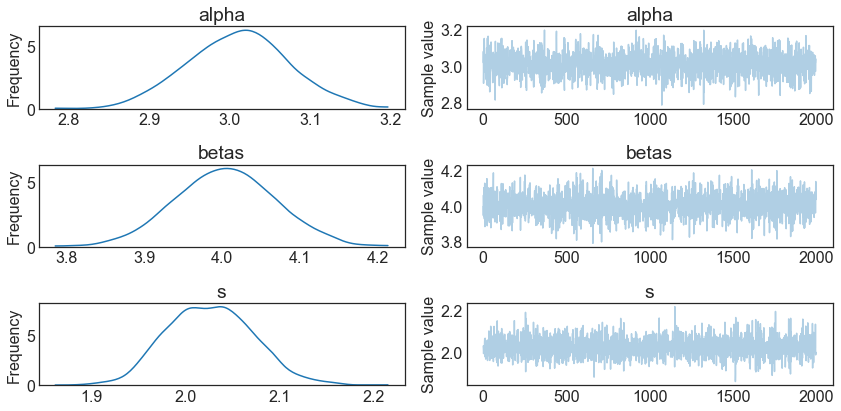

In [23]:
traceplot(LR2.trace)

Compare the two methods
===

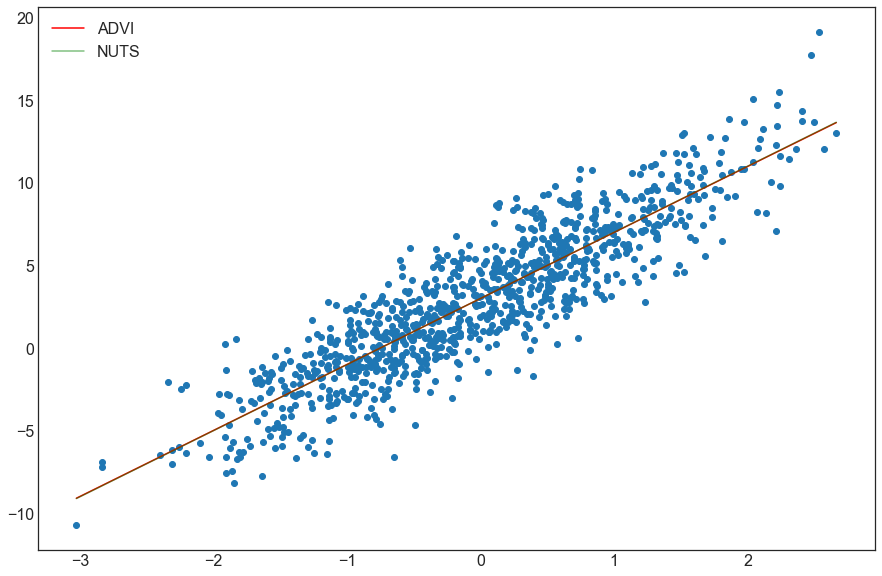

In [24]:
max_x = max(X)
min_x = min(X)

m = LR.summary['mean']['betas__0_0']
b = LR.summary['mean']['alpha__0']

m2 = LR2.summary['mean']['betas__0_0']
b2 = LR2.summary['mean']['alpha__0']
fig1 = plt.figure()
plt.scatter(X, Y)
plt.plot([min_x, max_x], [m*min_x + b, m*max_x + b], 'r', label='ADVI')
plt.plot([min_x, max_x], [m2*min_x + b2, m2*max_x + b2], 'g', label='NUTS', alpha=0.5)
plt.legend()

Multiple predictors
===

In [25]:
num_pred = 2
X = np.random.randn(1000, num_pred)
noise = 2 * np.random.randn(1000,)
Y = X.dot(np.array([4, 5])) + 3 + noise

In [26]:
Y = np.squeeze(Y)

In [27]:
LR3 = LinearRegression()

In [28]:
LR3.fit(X, Y)

Average Loss = 2,117.3:  19%|█▉        | 38481/200000 [00:41<02:55, 919.84it/s]  
Convergence archived at 38500
Interrupted at 38,499 [19%]: Average Loss = 6,001.6


LinearRegression()

In [29]:
LR3.summary

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha__0,2.945372,0.067524,0.000745,2.813910,3.077852
betas__0_0,3.937177,0.067821,0.000576,3.807520,4.069300
betas__0_1,5.125465,0.067147,0.000610,4.990070,5.252110
s,1.957995,0.048194,0.000444,1.862641,2.051906
